# By Game Mode Analysis

This section examines the data by game mode to see if the models were more accurate or if the coefficients would be different.

Two models were run per mode:

Core dataset results: 
- Logistic
   - CV: 0.5655823573739818
   - Train: 0.5667048976304937
   - Test: 0.5694926834823207

- Random Forest
   - CV: 0.6232582984049593
   - Train: 0.9358817931135459
   - Test: 0.6287650173660536

Quad:
- Logistic
    - CV: 0.5683585959828317
    - Train: 0.5709169207154583
    - Test: 0.5688581905005543

- Random Forest
    - CV: 0.6295434280264283
    - Train: 0.9383887266292877
    - Test: 0.6253091157158693

Trio:
- Logistic
    - CV: 0.5621747466447549
    - Train: 0.5655436866611887
    - Test: 0.560692375109553Logistic

- Random Forest
    - CV: 0.6119145439605588
    - Train: 0.9643385373870172
    - Test: 0.6136064855390009

Duo:
- Logistic
    - CV: 0.6106251593998675
    - Train: 0.623086302669015
    - Test: 0.6115926327193932

- Random Forest
    - CV: 0.6537066088331838
    - Train: 0.9998645170031161
    - Test: 0.6549295774647887

Solo:
- Logistic
    - CV: 0.5648442393174867
    - Train: 0.5836820083682008
    - Test: 0.5774058577405857

- Random Forest
    - CV: 0.6373612808678574
    - Train: 0.9965132496513249
    - Test: 0.596931659693166


From the results we can observe that running the models on the seperate game mode provides similar results than to the original model. The best performing is the Duo followed by the Quad. However, it has to be taken into account that there are significant inbalances. The first is that the majority of the data was either for Trios or Quads. The second is that within these categories we can immediately observe that for trios and quads the majority of the data represents high team placements whereas for solo and duo the data represents low team placements.

Still, the aim of this exercise was not to see if the model would be more accurate (it was not expected to be). The point was to see if the significance of the coefficients would change per game mode. Unfortunately, throughout all the modes the order and strengths of the coefficients remains very similar.

In [3]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline
import json
import time
import tqdm
from sklearn.linear_model import LinearRegression
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold,cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
import joblib
import pickle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import precision_score
import scikitplot as skplt
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import precision_score
import scikitplot as skplt

In [4]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 10000

In [7]:
df = pd.read_csv('official_wz_update_mode.csv', index_col = 0)

In [10]:
df1 = df.copy()

In [11]:
df_dummy = pd.get_dummies(df1, columns = [
 'map',
 'primary',
 'secondary',
 'lethal',
 'tactical',
 'attachment_1',
 'attachment_2',
 'attachment_3',
 'sec_attachment_1',                                      
 'sec_attachment_2',
 'perk_1'], drop_first = True)

In [12]:
cl = []
for value in df_dummy['playerStats.teamPlacement']:
    if value >= 1 and value <= 10:
        cl.append('class_1')
    elif value >= 11 and value <= 20:
        cl.append('class_2')
    elif value >= 21 and value <= 30:
        cl.append('class_3')
    elif value >= 31 and value <= 40:
        cl.append('class_4')
    else :
        cl.append('class_5')
   

In [13]:
df_dummy['playerStats.teamPlacement'] = cl

In [14]:
df_dummy.set_index('mode', inplace=True)
# df1.loc["br_brquads"]

In [16]:
df_quad = df_dummy.loc["quad"]

In [17]:
df_quad.head()

,teamCount,playerStats.kills,playerStats.headshots,playerStats.assists,playerStats.scorePerMinute,playerStats.deaths,playerStats.kdRatio,playerStats.gulagDeaths,playerStats.gulagKills,playerStats.percentTimeMoving,playerStats.longestStreak,playerStats.teamPlacement,player.username,player.clantag,dtpermin,takenpermin,donepermin,objecpermin,missionspermin,missionxppermin,weaponxppermin,medalxppermin,map_mp_donetsk2,map_mp_escape2,primary_iw8_ar_kilo433,primary_iw8_ar_mike4,primary_iw8_lm_kilo121,primary_iw8_lm_lima86,primary_iw8_sh_t9pump,primary_iw8_sm_t9heavy,primary_iw8_sn_kilo98,primary_iw8_sn_t9standard,secondary_iw8_pi_cpapa,secondary_iw8_pi_decho,secondary_iw8_pi_golf21,secondary_iw8_pi_papa320,secondary_iw8_pi_t9revolver,secondary_iw8_sh_charlie725,lethal_equip_frag,lethal_equip_molotov,lethal_equip_semtex,tactical_equip_flash,tactical_equip_smoke,attachment_1_holo,attachment_1_holo2,attachment_1_none,attachment_1_reflex,attachment_1_reflex2,attachment_1_scope,attachment_2_brake,attachment_2_comp,attachment_2_none,attachment_3_bipod,attachment_3_drums,attachment_3_none,sec_attachment_1_brake,sec_attachment_1_none,sec_attachment_1_reflexmini,sec_attachment_2_xmags,perk_1_specialty_twoprimaries
mode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
quad,39,0.0,0.0,1.0,26.264591,2.0,0.000000,1.0,0.0,43.838863,0.0,class_3,0,0,31362.811284,36.887160,3.735409,0.233463,0.0,0.0,0.0,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
quad,39,2.0,0.0,0.0,176.609105,2.0,1.000000,0.0,1.0,93.978100,1.0,class_3,0,1,36546.964521,45.117739,80.156986,1.036107,0.0,0.0,0.0,2.825746,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
quad,39,1.0,0.0,0.0,36.935705,2.0,0.500000,0.0,1.0,86.956520,1.0,class_3,0,0,30562.492202,26.019152,16.826265,0.164159,0.0,0.0,0.0,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0
quad,39,0.0,0.0,0.0,134.663342,1.0,0.000000,0.0,0.0,98.726120,0.0,class_4,0,1,45392.169576,38.304239,0.299252,1.346633,0.0,0.0,0.0,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0
quad,39,1.0,0.0,1.0,284.749801,3.0,0.333333,2.0,0.0,64.957270,0.0,class_1,0,1,22736.303733,56.235107,14.868944,0.714853,0.0,0.0,0.0,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0


In [18]:
action = df_quad.copy()

In [19]:
X = action.copy().drop(columns = ['playerStats.teamPlacement'])
y = action.copy().pop('playerStats.teamPlacement')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [21]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [22]:
X_train.shape

(46907, 59)

### Quad - Logistic

In [24]:
pd.Series(y).value_counts(normalize=True)

class_3    0.279701
class_2    0.271225
class_1    0.225194
class_4    0.210902
class_5    0.012979
Name: playerStats.teamPlacement, dtype: float64

In [25]:
model = LogisticRegression(random_state=1, max_iter = 100000)
# different solver

model.fit(X_train, y_train)
print(cross_val_score(model, X_train, y_train, cv=5).mean())
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.5683585959828317
0.5709169207154583
0.5688581905005543


In [26]:
params = {'penalty': ['l1', 'l2'],
                   'solver': ['liblinear'],        #l2 / max iter = 100,000 - the best solver
                   'C': np.linspace(0.05, 0.15, 9)}
gs = GridSearchCV(model, params, cv=5, n_jobs=-2, verbose=3)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))
# do again with fine tuning - fine tune 
# fine tune logisitc the C-value

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  26 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:  6.0min finished


0.5591489267518259
0.5614513825228644
0.5560671953611325


In [27]:
df_coef = pd.DataFrame(gs.best_estimator_.coef_[2], index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()

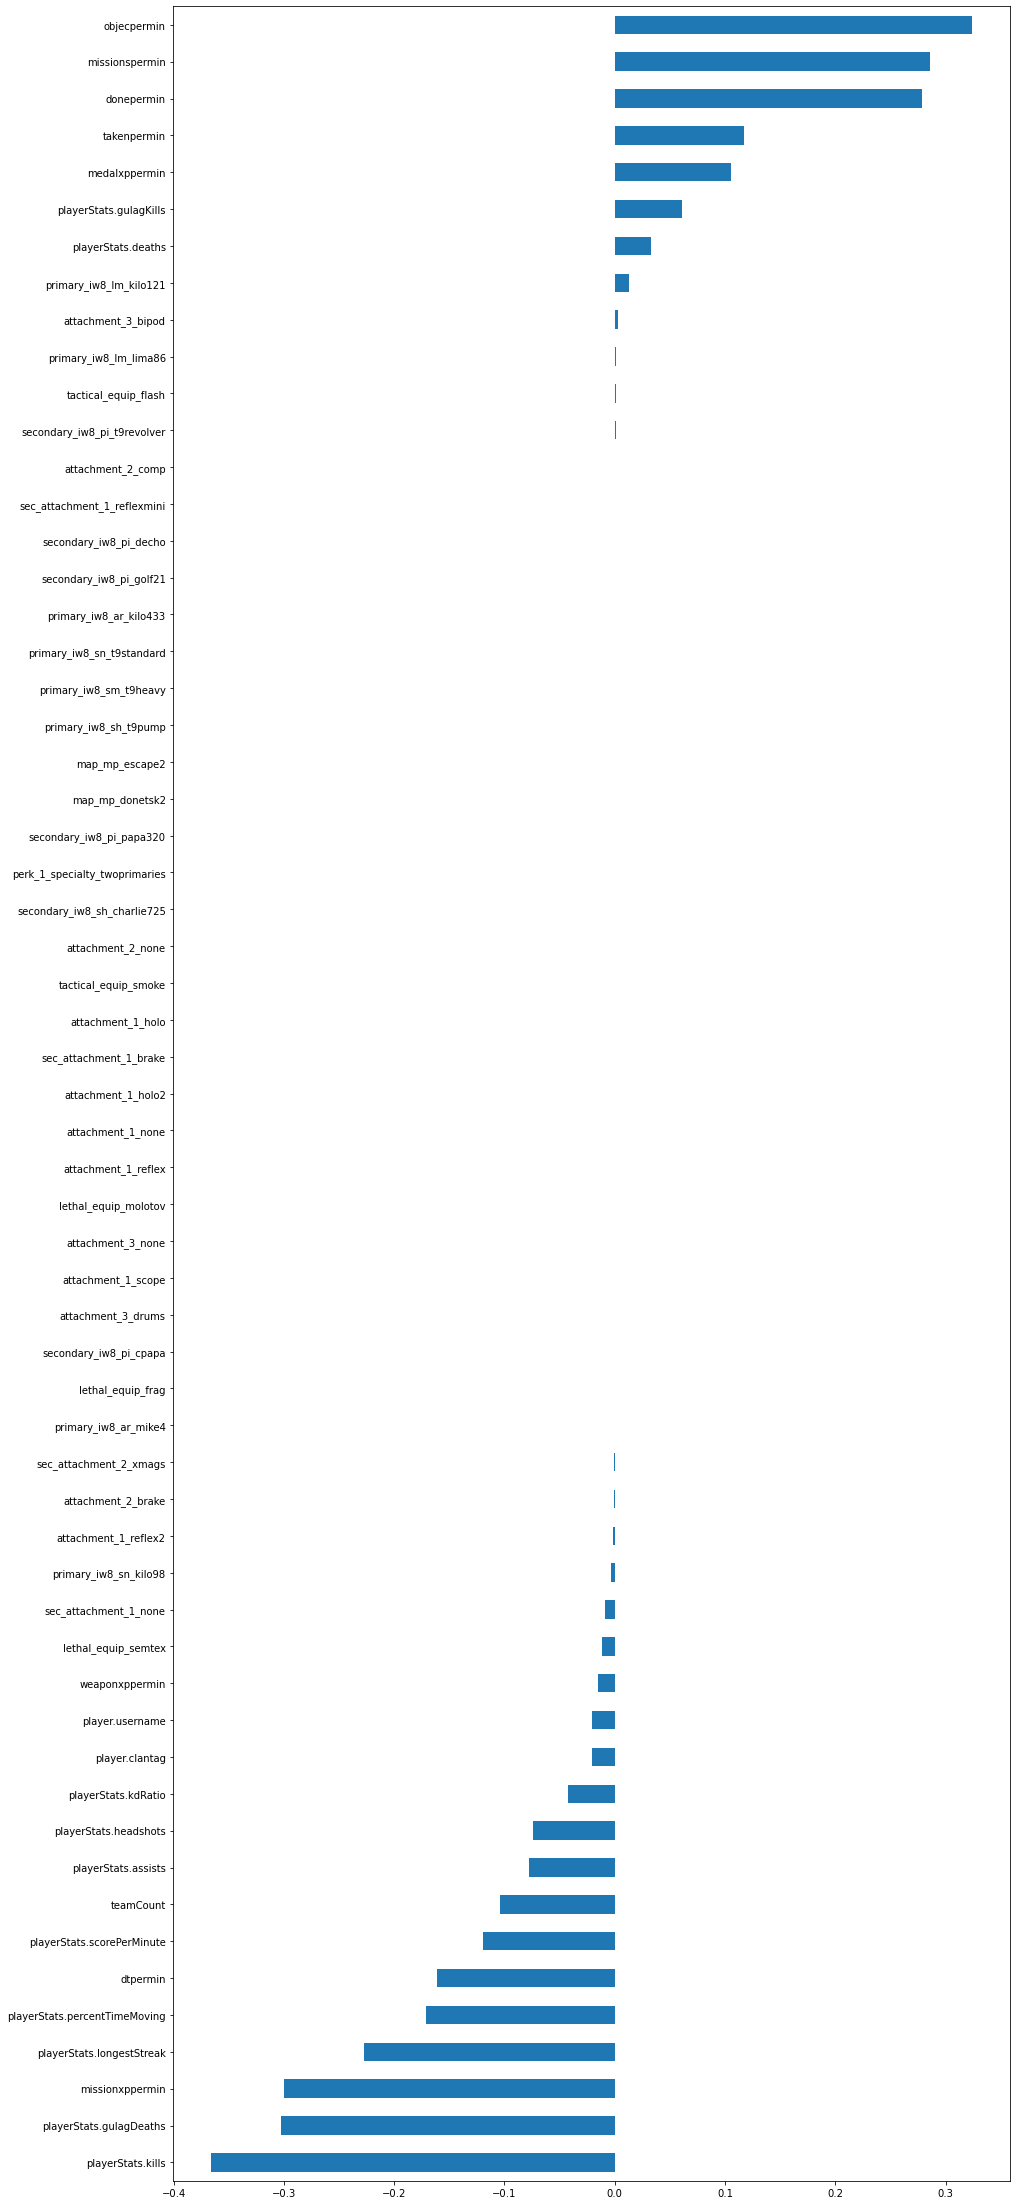

In [28]:
df_coef['coefficients'].sort_values().plot(kind='barh', figsize=(15, 40));

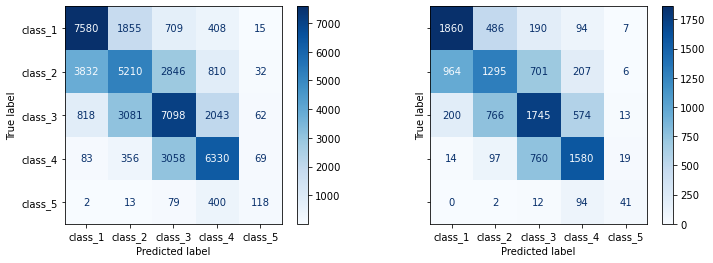

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(gs, X_train, y_train, cmap='Blues', ax=ax[0], normalize= None)
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', ax=ax[1], normalize= None)

for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(10)

plt.show()

In [32]:
predictions_train = gs.predict(X_train)
predictions_test = gs.predict(X_test)

In [33]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

     class_1       0.61      0.71      0.66      2637
     class_2       0.49      0.41      0.45      3173
     class_3       0.51      0.53      0.52      3298
     class_4       0.62      0.64      0.63      2470
     class_5       0.48      0.28      0.35       149

    accuracy                           0.56     11727
   macro avg       0.54      0.51      0.52     11727
weighted avg       0.55      0.56      0.55     11727



### Quad - Random Forest

In [34]:
model = RandomForestClassifier(
                           n_estimators=300,
                           random_state=1)

tree_params = {
    'max_depth': [10,15,20,25]
}

# set the gridsearch

gs_random = GridSearchCV(model, tree_params, cv=5,
                      verbose=3, n_jobs=-2, return_train_score=True)  #njobs at 2
gs_random.fit(X_train, y_train)
print(gs_random.best_score_)
print(gs_random.score(X_train, y_train))
print(gs_random.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 out of  20 | elapsed:  6.0min finished


0.6295434280264283
0.9383887266292877
0.6253091157158693


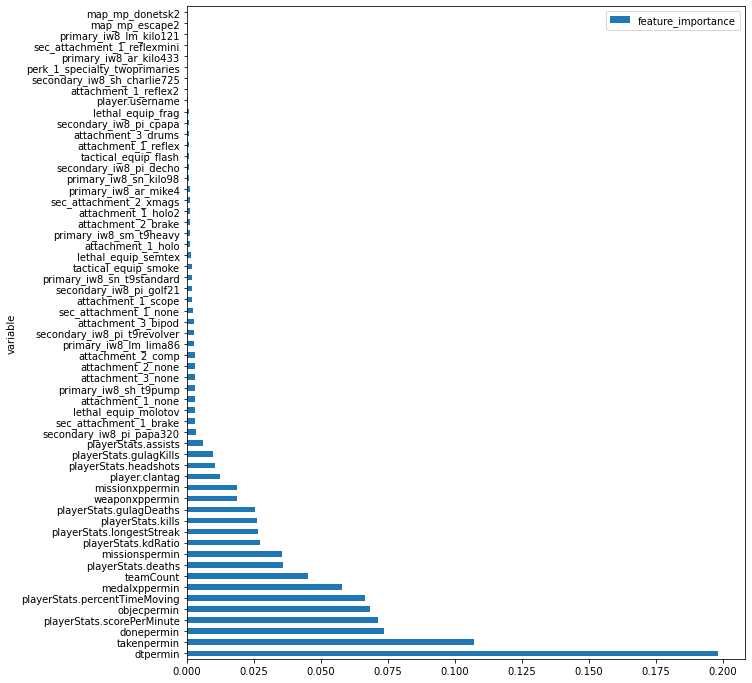

In [35]:
trial = pd.DataFrame({'feature_importance': gs_random.best_estimator_.feature_importances_, 'variable': X.columns})
trial.sort_values('feature_importance', ascending = False, inplace = True)
trial.head(60).plot(kind='barh', x = 'variable', y = 'feature_importance', figsize=(10, 12))
plt.show()

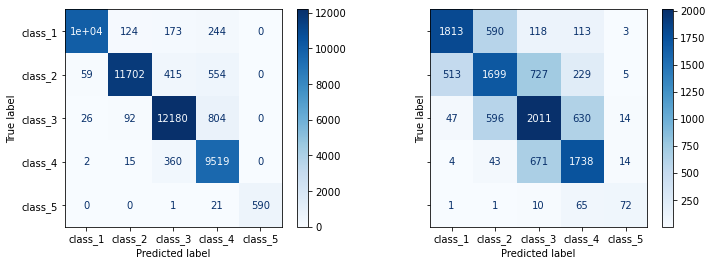

In [36]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(gs_random, X_train, y_train, cmap='Blues', ax=ax[0], normalize= None)
plot_confusion_matrix(gs_random, X_test, y_test, cmap='Blues', ax=ax[1], normalize= None)

for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(10)

plt.show()

In [51]:
predictions_train_random = gs_random.predict(X_train)
predictions_test_random = gs_random.predict(X_test)

In [52]:
print(classification_report(y_test, predictions_test_random))

              precision    recall  f1-score   support

     class_1       0.65      0.81      0.72      1554
     class_2       0.50      0.54      0.52      1947
     class_3       0.36      0.53      0.43      1913
     class_4       0.27      0.30      0.28      2026
     class_5       0.71      0.01      0.02      1688

    accuracy                           0.43      9128
   macro avg       0.50      0.44      0.39      9128
weighted avg       0.48      0.43      0.39      9128



### Trio - Logistic

In [39]:
df_trio = df_dummy.loc["trio"]

In [40]:
action = df_trio.copy()

In [41]:
X = action.copy().drop(columns = ['playerStats.teamPlacement'])
y = action.copy().pop('playerStats.teamPlacement')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [43]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [44]:
X_train.shape

(36510, 59)

In [45]:
pd.Series(y).value_counts(normalize=True)

class_4    0.217582
class_3    0.216070
class_2    0.206823
class_5    0.189513
class_1    0.170012
Name: playerStats.teamPlacement, dtype: float64

In [55]:
model3 = LogisticRegression(random_state=1, max_iter = 100000)
# different solver

model3.fit(X_train, y_train)
print(cross_val_score(model3, X_train, y_train, cv=5).mean())
print(model3.score(X_train, y_train))
print(model3.score(X_test, y_test))

0.5621747466447549
0.5655436866611887
0.560692375109553


In [56]:
params = {'penalty': ['l1', 'l2'],
                   'solver': ['liblinear'],        #l2 / max iter = 100,000
                   'C': np.linspace(0.05, 0.15, 9)}
gs3 = GridSearchCV(model3, params, cv=5, n_jobs=-2, verbose=3)
gs3.fit(X_train, y_train)
print(gs3.best_score_)
print(gs3.score(X_train, y_train))
print(gs3.score(X_test, y_test))
# do again with fine tuning - fine tune 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  26 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:  4.1min finished


0.5397973158038893
0.5446179129005752
0.5437116564417178


In [57]:
df_coef = pd.DataFrame(gs3.best_estimator_.coef_[3], index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()

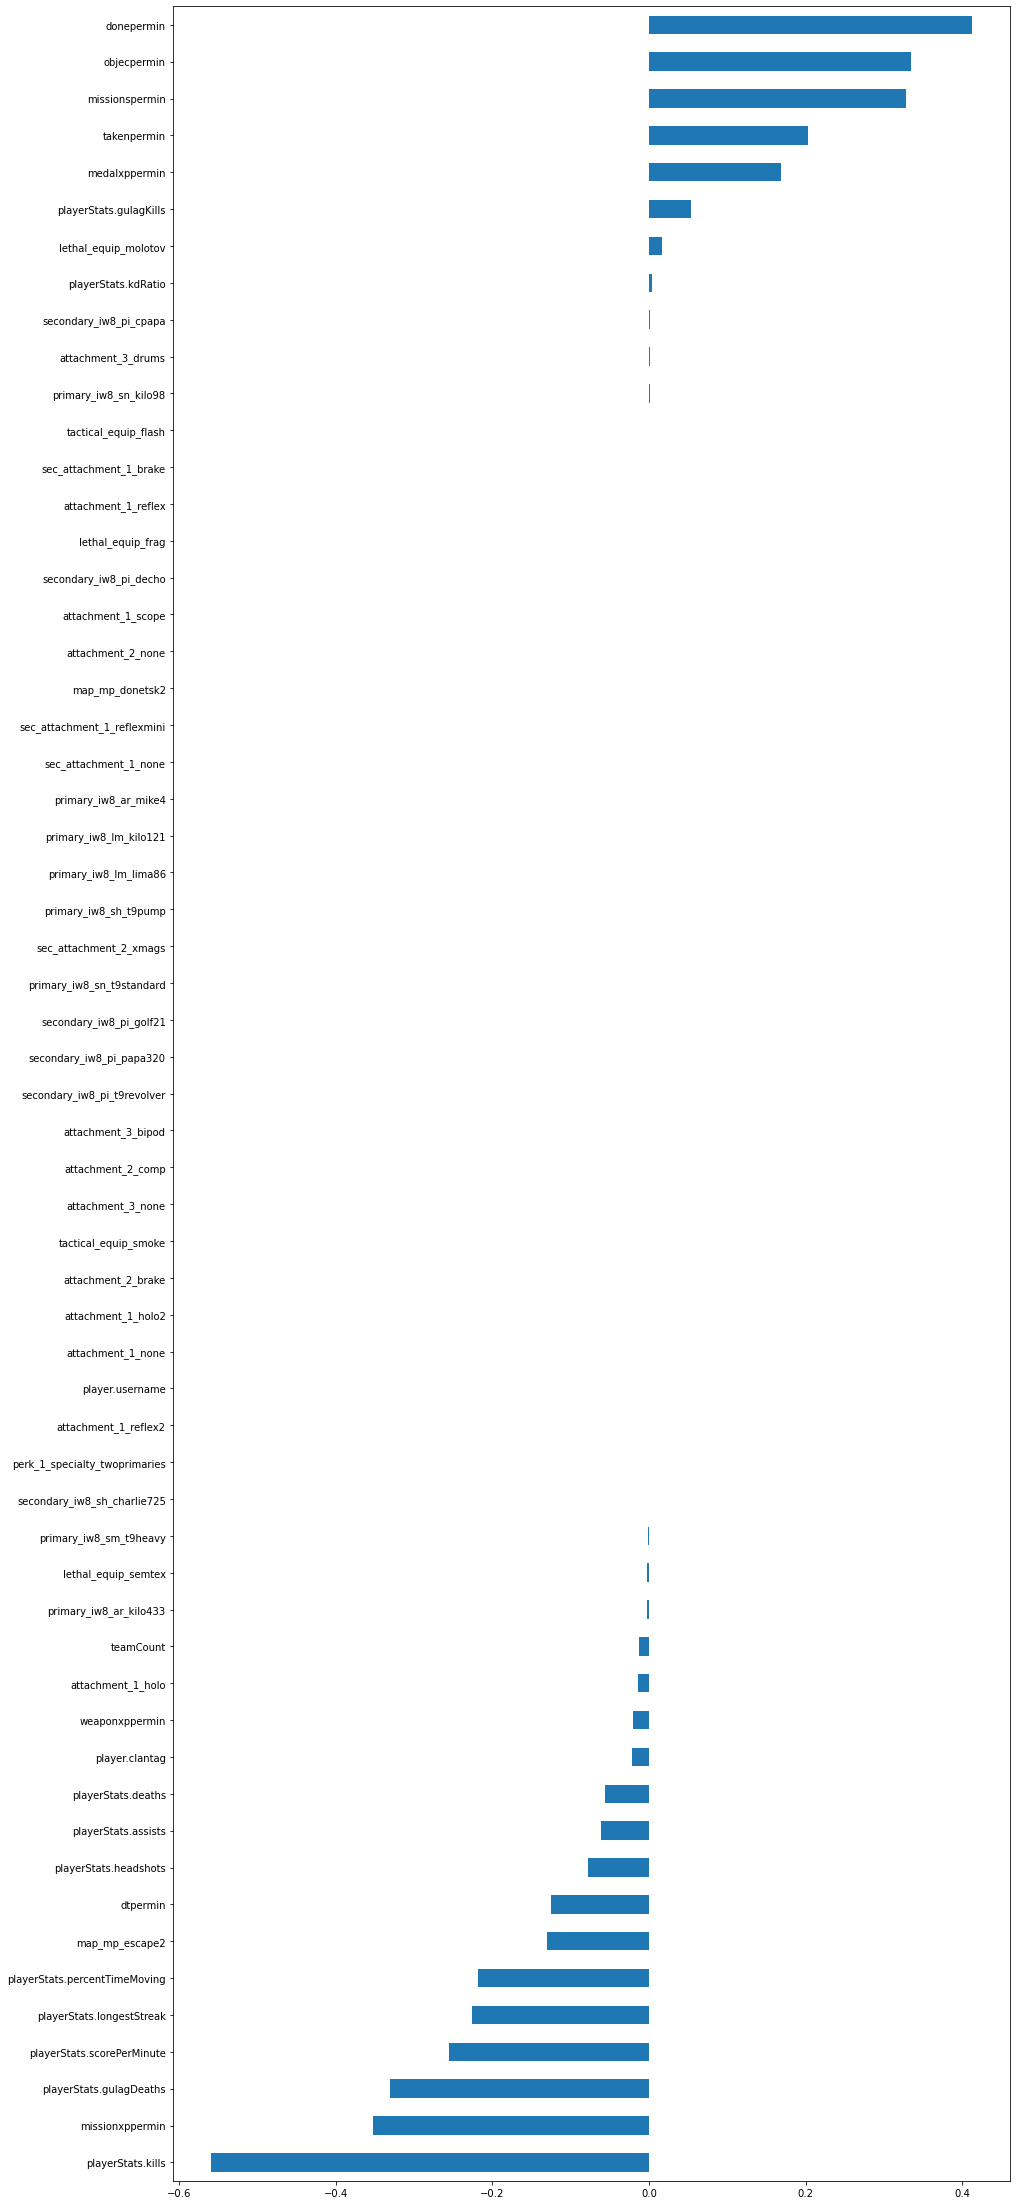

In [58]:
df_coef['coefficients'].sort_values().plot(kind='barh', figsize=(15, 40));

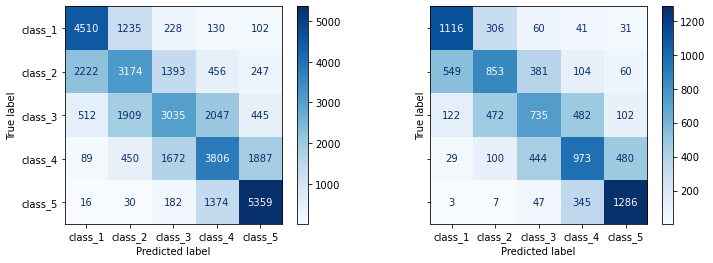

In [59]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(gs3, X_train, y_train, cmap='Blues', ax=ax[0], normalize= None)
plot_confusion_matrix(gs3, X_test, y_test, cmap='Blues', ax=ax[1], normalize= None)

for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(10)

plt.show()

### Trio - Random Forest

In [60]:
model = RandomForestClassifier(
                           n_estimators=300,
                           random_state=1)

tree_params = {
    'max_depth': [10,15,20,25]
}

# set the gridsearch

gs_random3 = GridSearchCV(model, tree_params, cv=5,
                      verbose=3, n_jobs=-2, return_train_score=True)
gs_random3.fit(X_train, y_train)
print(gs_random3.best_score_)
print(gs_random3.score(X_train, y_train))
print(gs_random3.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 out of  20 | elapsed:  3.3min finished


0.6119145439605588
0.9643385373870172
0.6136064855390009


In [61]:
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gs_random3.best_estimator_.feature_importances_
})

fi.sort_values('importance', ascending=False, inplace=True)

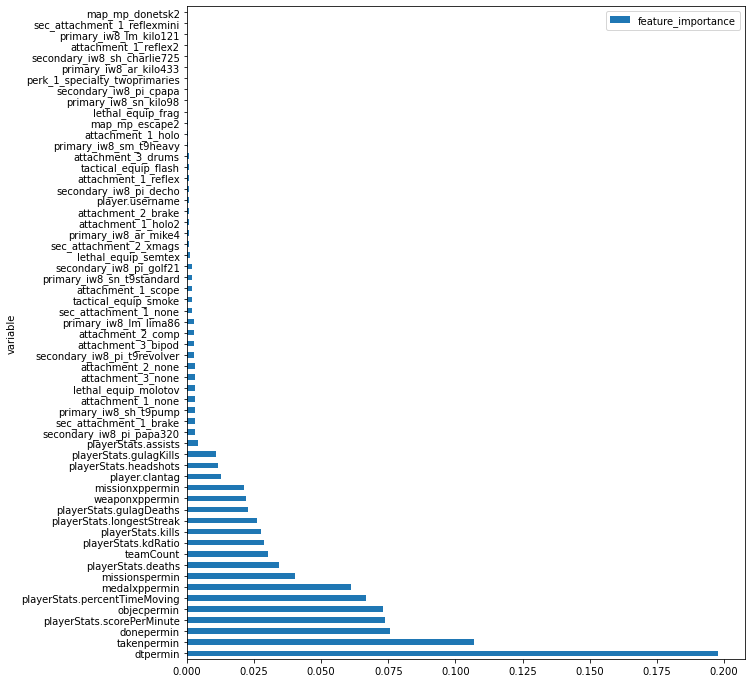

In [62]:
trial = pd.DataFrame({'feature_importance': gs_random3.best_estimator_.feature_importances_, 'variable': X.columns})
trial.sort_values('feature_importance', ascending = False, inplace = True)
trial.head(60).plot(kind='barh', x = 'variable', y = 'feature_importance', figsize=(10, 12))
plt.show()

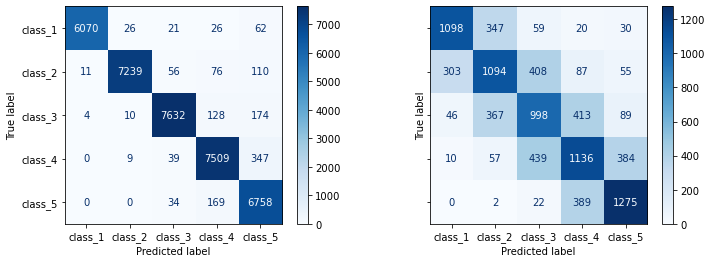

In [63]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(gs_random3, X_train, y_train, cmap='Blues', ax=ax[0], normalize= None)
plot_confusion_matrix(gs_random3, X_test, y_test, cmap='Blues', ax=ax[1], normalize= None)

for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(10)

plt.show()

In [64]:
predictions_train_random3 = gs_random3.predict(X_train)
predictions_test_random3 = gs_random3.predict(X_test)

In [65]:
print(classification_report(y_test, predictions_test_random3))

              precision    recall  f1-score   support

     class_1       0.75      0.71      0.73      1554
     class_2       0.59      0.56      0.57      1947
     class_3       0.52      0.52      0.52      1913
     class_4       0.56      0.56      0.56      2026
     class_5       0.70      0.76      0.72      1688

    accuracy                           0.61      9128
   macro avg       0.62      0.62      0.62      9128
weighted avg       0.61      0.61      0.61      9128



### Duo - Logistic

In [152]:
df_duo = df_dummy.loc["duo"]

In [153]:
df_duo.shape

(9227, 60)

In [154]:
action = df_duo.copy()

In [155]:
X = action.copy().drop(columns = ['playerStats.teamPlacement'])
y = action.copy().pop('playerStats.teamPlacement')

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [157]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [158]:
X_train.shape

(7381, 59)

In [159]:
pd.Series(y).value_counts(normalize=True)

class_5    0.474585
class_4    0.147610
class_3    0.140457
class_2    0.131354
class_1    0.105993
Name: playerStats.teamPlacement, dtype: float64

In [160]:
model2 = LogisticRegression(random_state=1, max_iter = 100000)
# different solver

model2.fit(X_train, y_train)
print(cross_val_score(model2, X_train, y_train, cv=5).mean())
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.6289150900987683
0.6432732692047148
0.6419284940411701


In [161]:
params = {'penalty': ['l1', 'l2'],
                   'solver': ['liblinear'],        #l2 / max iter = 100,000
                   'C': np.linspace(0.05, 0.15, 9)}
gs2 = GridSearchCV(model2, params, cv=5, n_jobs=-2, verbose=3)
gs2.fit(X_train, y_train)
print(gs2.best_score_)
print(gs2.score(X_train, y_train))
print(gs2.score(X_test, y_test))
# do again with fine tuning - fine tune 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  26 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:   32.1s finished


0.6106251593998675
0.623086302669015
0.6115926327193932


In [162]:
df_coef = pd.DataFrame(gs2.best_estimator_.coef_[0], index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()

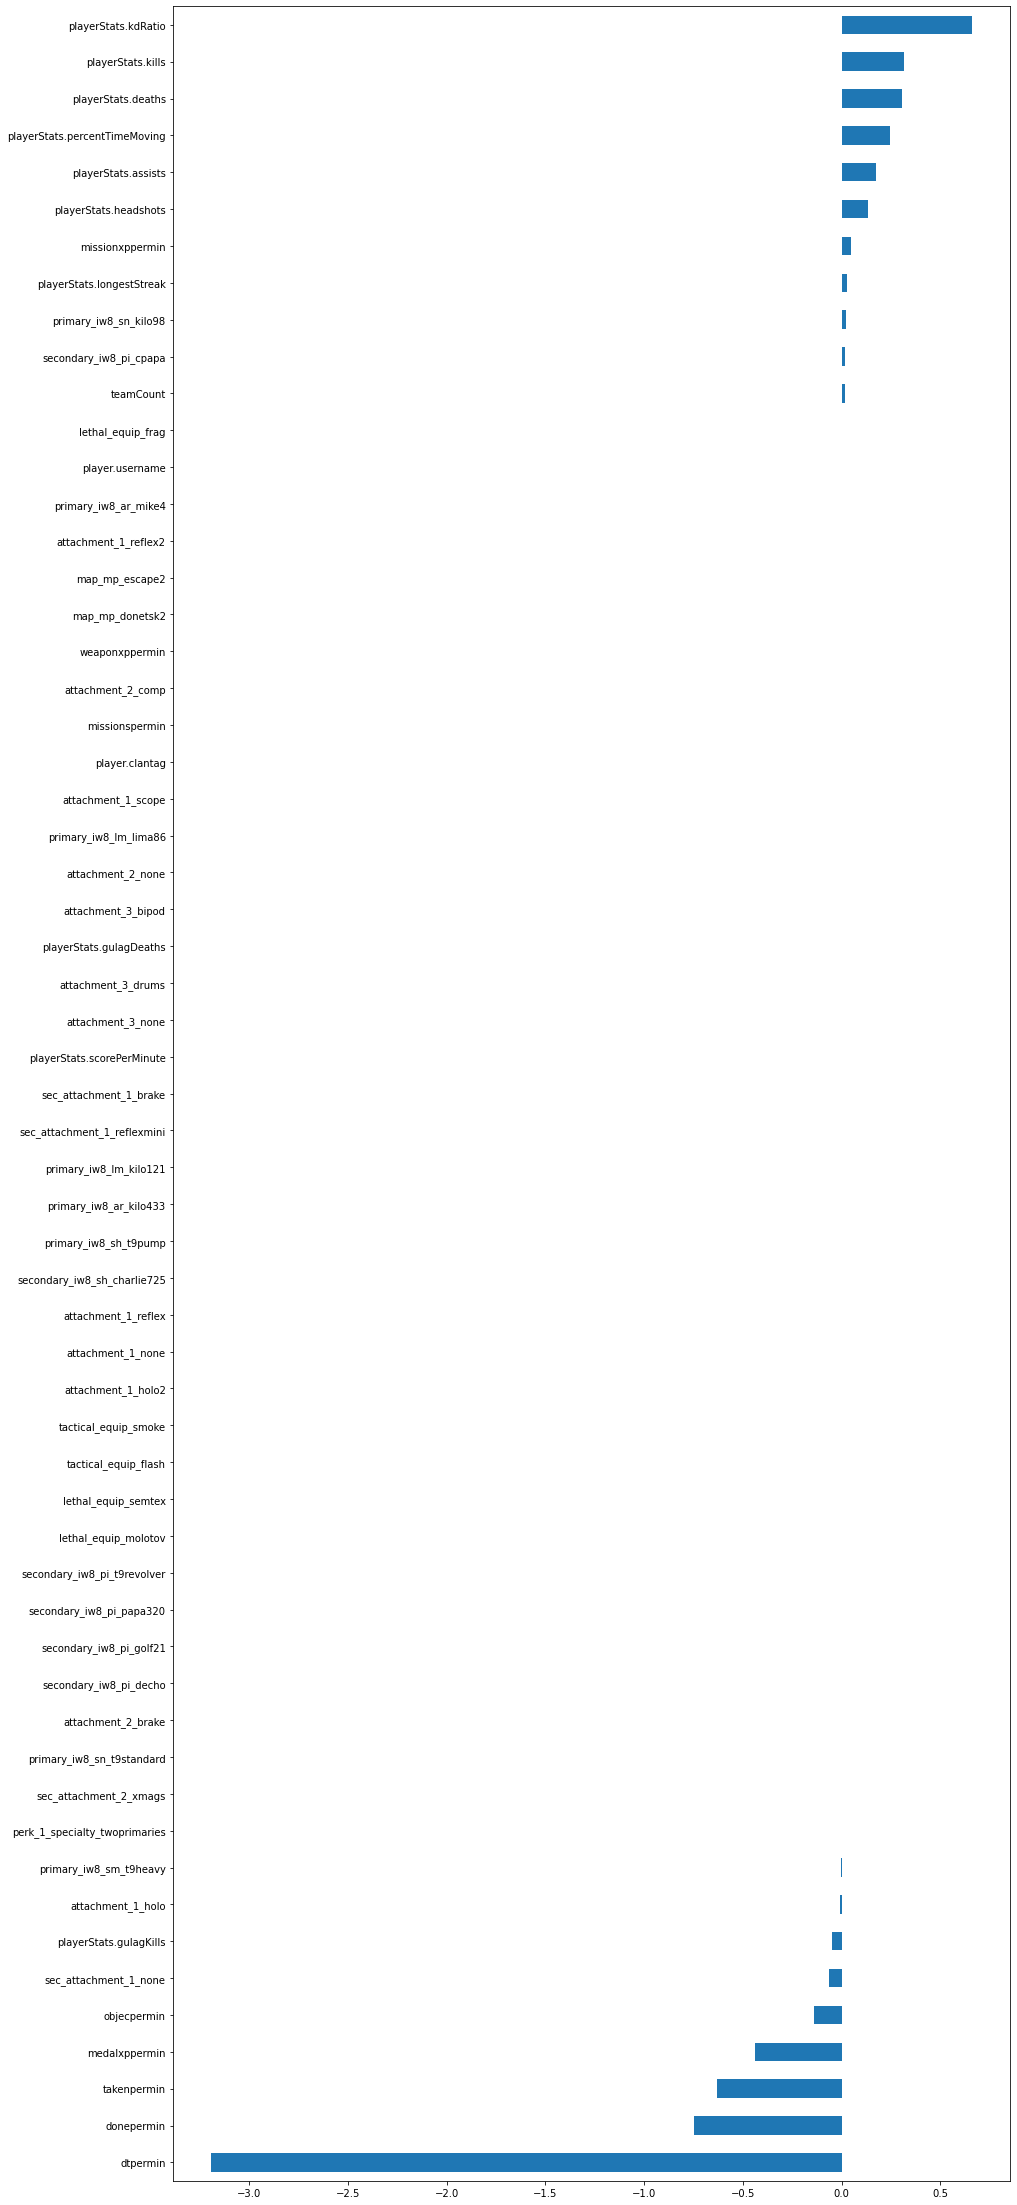

In [163]:
df_coef['coefficients'].sort_values().plot(kind='barh', figsize=(15, 40));

### Duo - Random Forest

In [164]:
model = RandomForestClassifier(
                           n_estimators=300,
                           random_state=1)

tree_params = {
    'max_depth': [10,15,20,25]
}

# set the gridsearch

gs_random2 = GridSearchCV(model, tree_params, cv=5,
                      verbose=3, n_jobs=-2, return_train_score=True)
gs_random2.fit(X_train, y_train)
print(gs_random2.best_score_)
print(gs_random2.score(X_train, y_train))
print(gs_random2.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 out of  20 | elapsed:   38.9s finished


0.6537066088331838
0.9998645170031161
0.6549295774647887


In [165]:
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gs_random2.best_estimator_.feature_importances_
})

fi.sort_values('importance', ascending=False, inplace=True)

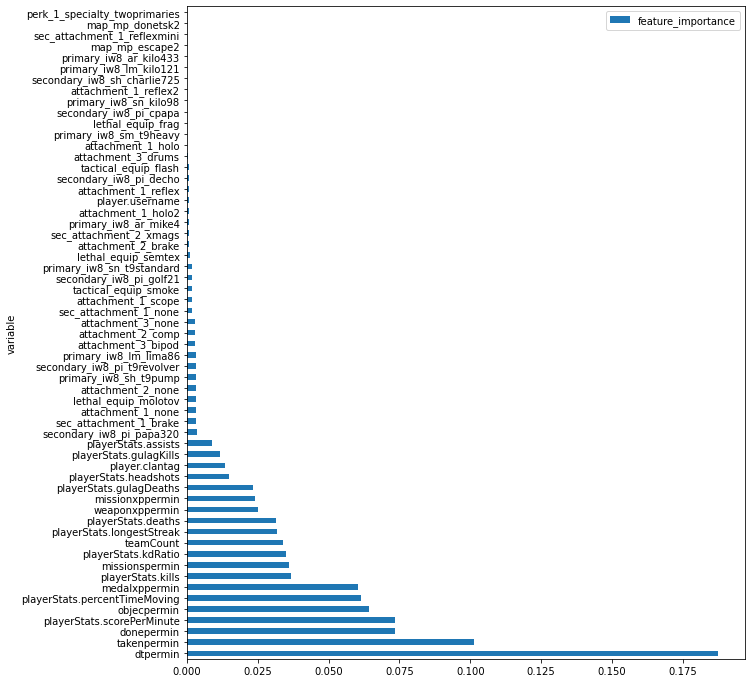

In [166]:
trial = pd.DataFrame({'feature_importance': gs_random2.best_estimator_.feature_importances_, 'variable': X.columns})
trial.sort_values('feature_importance', ascending = False, inplace = True)
trial.head(60).plot(kind='barh', x = 'variable', y = 'feature_importance', figsize=(10, 12))
plt.show()

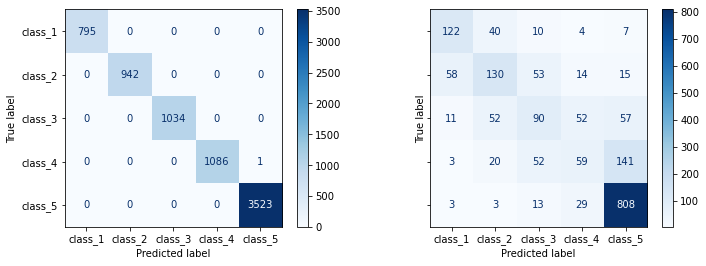

In [167]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(gs_random2, X_train, y_train, cmap='Blues', ax=ax[0], normalize= None)
plot_confusion_matrix(gs_random2, X_test, y_test, cmap='Blues', ax=ax[1], normalize= None)

for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(10)

plt.show()

In [168]:
predictions_train_random2 = gs_random2.predict(X_train)
predictions_test_random2 = gs_random2.predict(X_test)

In [169]:
print(classification_report(y_test, predictions_test_random2))

              precision    recall  f1-score   support

     class_1       0.62      0.67      0.64       183
     class_2       0.53      0.48      0.50       270
     class_3       0.41      0.34      0.38       262
     class_4       0.37      0.21      0.27       275
     class_5       0.79      0.94      0.86       856

    accuracy                           0.65      1846
   macro avg       0.54      0.53      0.53      1846
weighted avg       0.62      0.65      0.63      1846



### Solo - Logistic

In [170]:
df_solo = df_dummy.loc["solo"]

In [171]:
df_solo.shape

(3585, 60)

In [172]:
action = df_solo.copy()

In [173]:
X = action.copy().drop(columns = ['playerStats.teamPlacement'])
y = action.copy().pop('playerStats.teamPlacement')

In [174]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [175]:
X_train.shape

(2868, 59)

In [176]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [177]:
pd.Series(y).value_counts(normalize=True)

class_5    0.273361
class_4    0.193863
class_3    0.191911
class_2    0.184937
class_1    0.155927
Name: playerStats.teamPlacement, dtype: float64

In [178]:
model1 = LogisticRegression(random_state=1, max_iter = 100000)
# different solver

model1.fit(X_train, y_train)
print(cross_val_score(model1, X_train, y_train, cv=5).mean())
print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

0.5878626460161386
0.6175034867503487
0.602510460251046


In [179]:
params = {'penalty': ['l1', 'l2'],
                   'solver': ['liblinear'],        #l2 / max iter = 100,000
                   'C': np.linspace(0.05, 0.15, 9)}
gs1 = GridSearchCV(model1, params, cv=5, n_jobs=-2, verbose=3)
gs1.fit(X_train, y_train)
print(gs1.best_score_)
print(gs1.score(X_train, y_train))
print(gs1.score(X_test, y_test))
# do again with fine tuning - fine tune 
# fine tune logisitc the C-value

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:    8.2s finished


0.5648442393174867
0.5836820083682008
0.5774058577405857


In [180]:
df_coef = pd.DataFrame(gs1.best_estimator_.coef_[0], index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()

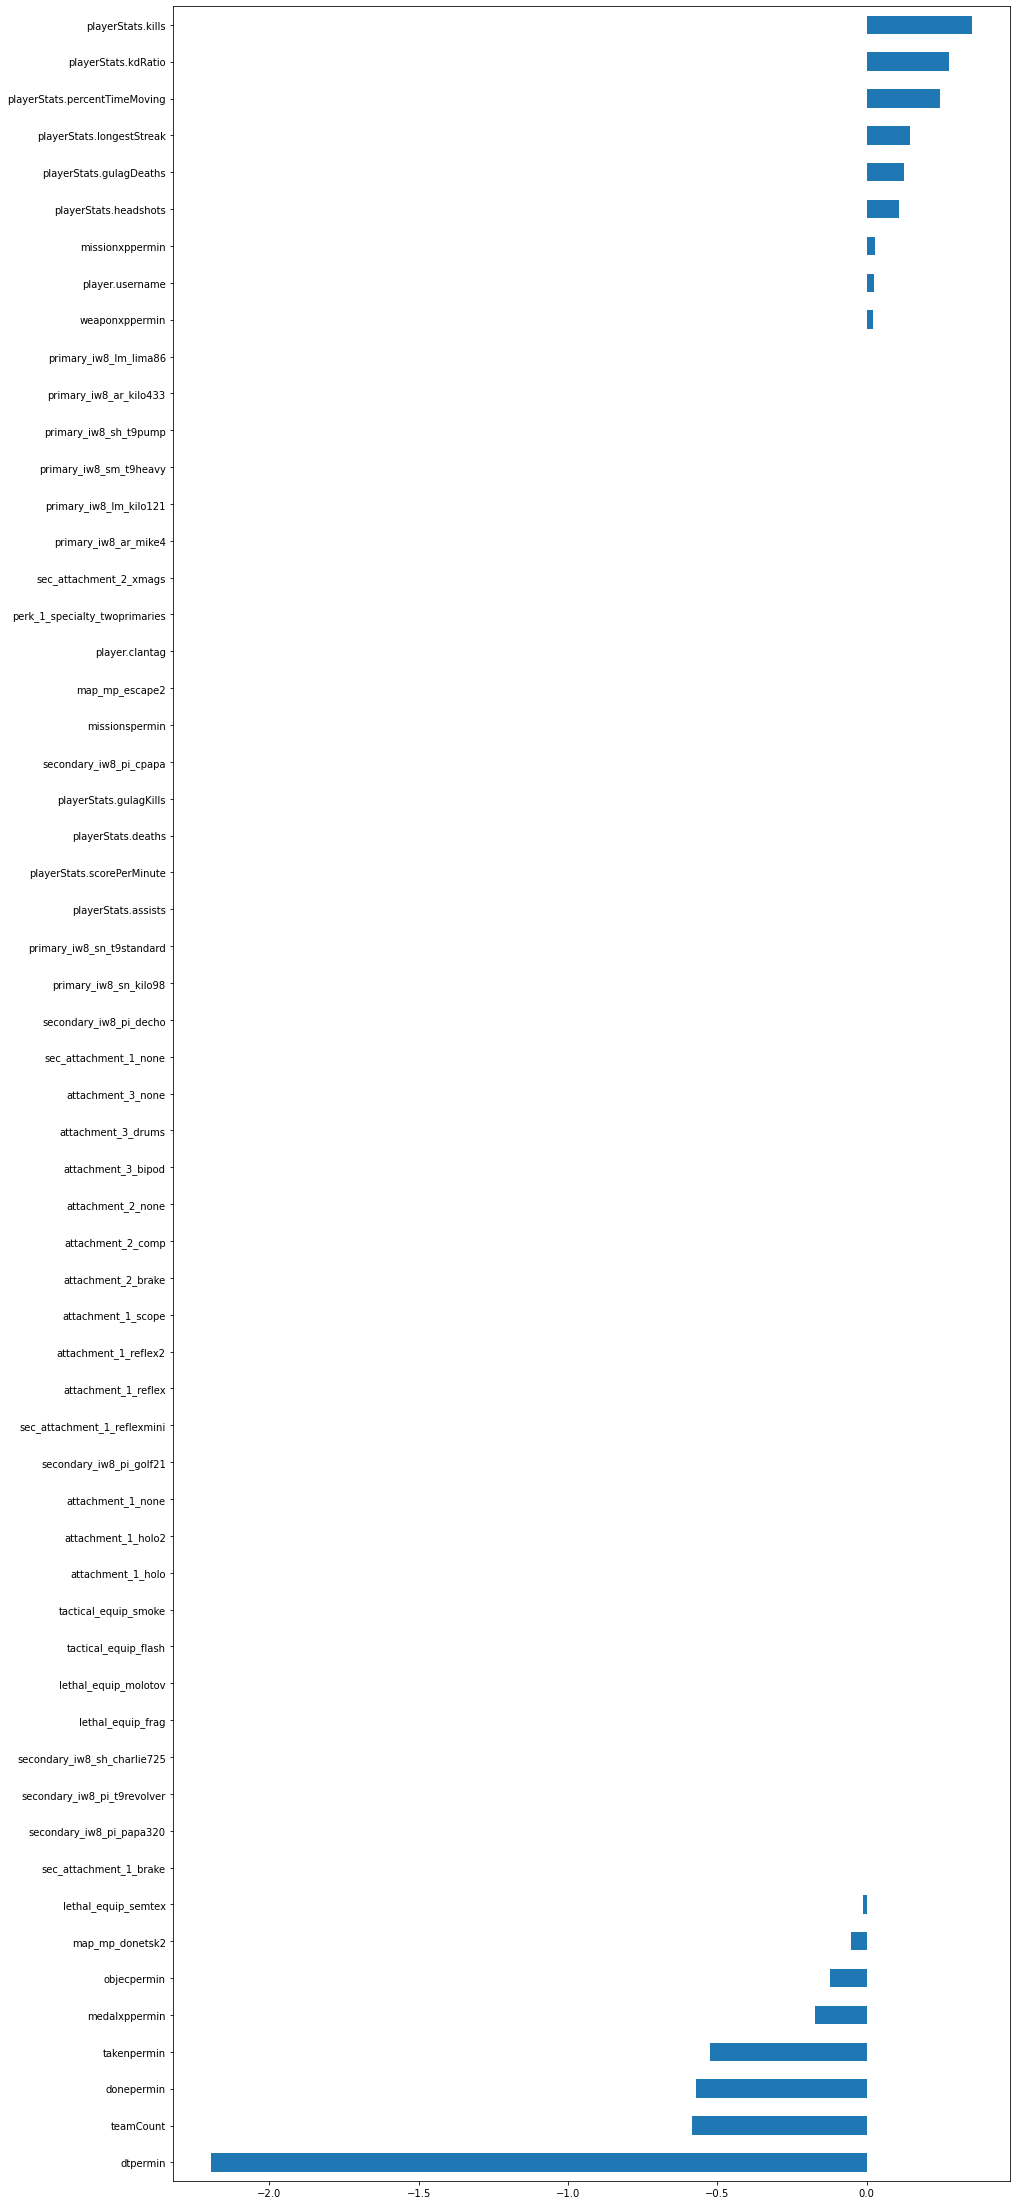

In [181]:
df_coef['coefficients'].sort_values().plot(kind='barh', figsize=(15, 40));

### Solo - Random Forest

In [182]:
model = RandomForestClassifier(
                           n_estimators=300,
                           random_state=1)

tree_params = {
    'max_depth': [10,15,20,25]
}

# set the gridsearch

gs_random1 = GridSearchCV(model, tree_params, cv=5,
                      verbose=3, n_jobs=-2, return_train_score=True)
gs_random1.fit(X_train, y_train)
print(gs_random1.best_score_)
print(gs_random1.score(X_train, y_train))
print(gs_random1.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 out of  20 | elapsed:   17.5s finished


0.6373612808678574
0.9965132496513249
0.596931659693166


In [183]:
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gs_random1.best_estimator_.feature_importances_
})

fi.sort_values('importance', ascending=False, inplace=True)

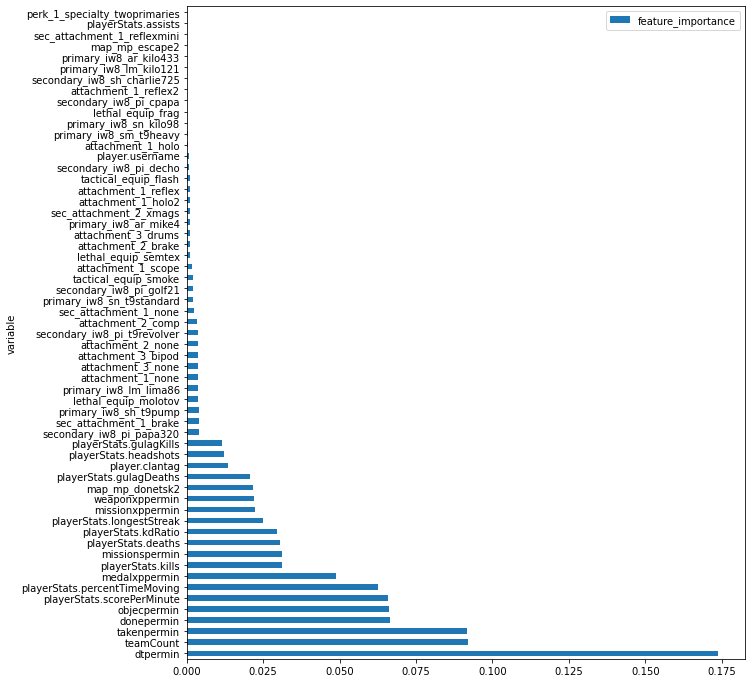

In [184]:
trial = pd.DataFrame({'feature_importance': gs_random1.best_estimator_.feature_importances_, 'variable': X.columns})
trial.sort_values('feature_importance', ascending = False, inplace = True)
trial.head(60).plot(kind='barh', x = 'variable', y = 'feature_importance', figsize=(10, 12))
plt.show()

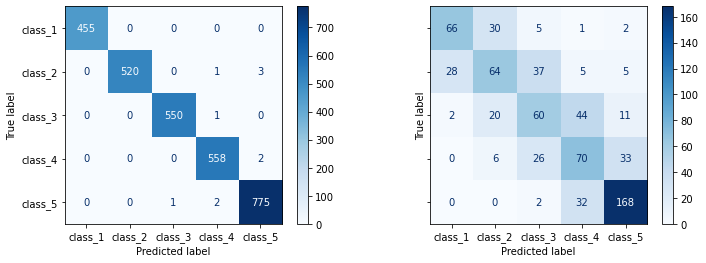

In [185]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(gs_random1, X_train, y_train, cmap='Blues', ax=ax[0], normalize= None)
plot_confusion_matrix(gs_random1, X_test, y_test, cmap='Blues', ax=ax[1], normalize= None)

for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(10)

plt.show()

In [186]:
predictions_train_random1 = gs_random1.predict(X_train)
predictions_test_random1 = gs_random1.predict(X_test)

In [187]:
print(classification_report(y_test, predictions_test_random1))

              precision    recall  f1-score   support

     class_1       0.69      0.63      0.66       104
     class_2       0.53      0.46      0.49       139
     class_3       0.46      0.44      0.45       137
     class_4       0.46      0.52      0.49       135
     class_5       0.77      0.83      0.80       202

    accuracy                           0.60       717
   macro avg       0.58      0.58      0.58       717
weighted avg       0.59      0.60      0.59       717

